## Pseudo Random Number Generator

Let us learn about how to generate a random number.

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

#### 1) Linear Congruent
One of the easiest way to make random number is using linear congruential.

$$x_{n+1} = a x_{n} + b \mod k$$

pick a random $a$ and $b$ then try.

In [10]:
x= 111
a = 32231
b = 921
k = 11
for i in range(100):
    x = (a * x + b) % k
    print(x)
    
np.seed(1234)

9
6
3
0
8
5
2
10
7
4
1
9
6
3
0
8
5
2
10
7
4
1
9
6
3
0
8
5
2
10
7
4
1
9
6
3
0
8
5
2
10
7
4
1
9
6
3
0
8
5
2
10
7
4
1
9
6
3
0
8
5
2
10
7
4
1
9
6
3
0
8
5
2
10
7
4
1
9
6
3
0
8
5
2
10
7
4
1
9
6
3
0
8
5
2
10
7
4
1
9


#### 2) Cycle Problem

One of the problem with linear congruent is short cycle length. For example,

$$x_{n+1} =  ax_{n} + b \mod 11$$

No matter what value you give $a$ and $b$. Your cycle length will be at most 11.

#### 3) Fixing Cycle problem

One way to do it is to generate it with a better cycle and then mod 11.

#### 4) Some available random number from numpy/python

`np.random.random` for random a float uniformly between 0 and 1.

`np.random.randint` for random integer uniformly in some range.

`np.random.randn` for random float from normal distribution with mean 0 and standard deviation 1.

(array([ 9977.,  9955.,  9879.,  9892., 10122., 10083., 10166., 10099.,
         9980.,  9847.]),
 array([3.47912717e-06, 1.00003094e-01, 2.00002710e-01, 3.00002325e-01,
        4.00001940e-01, 5.00001555e-01, 6.00001171e-01, 7.00000786e-01,
        8.00000401e-01, 9.00000016e-01, 9.99999632e-01]),
 <BarContainer object of 10 artists>)

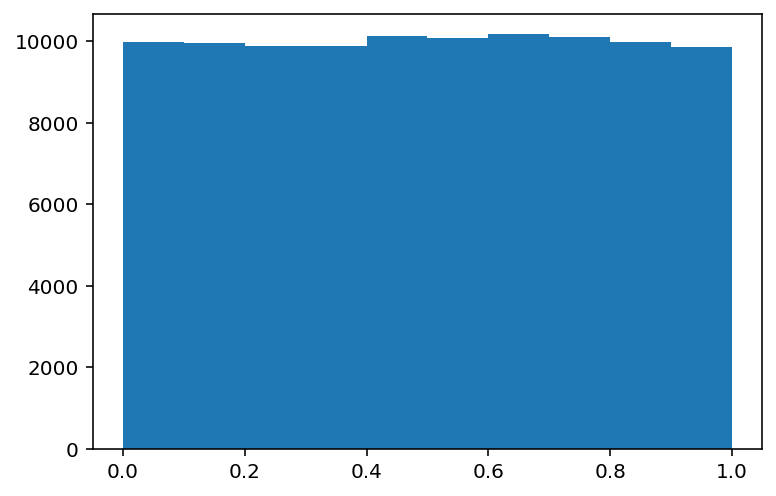

In [15]:
import numpy as np

data = np.random.random(100000)

plt.hist(data, bins=10)


#### 5) Manipulating random number to get desired behavior.

Random a float from 0 to 5.

Random a float from -1 to 1.

Random a float form normal distribution with mean 5 and std dev 1.

Random a float form normal distribution with mean 2 and std dev 10.

1.9957769207000904 10.012296833508758


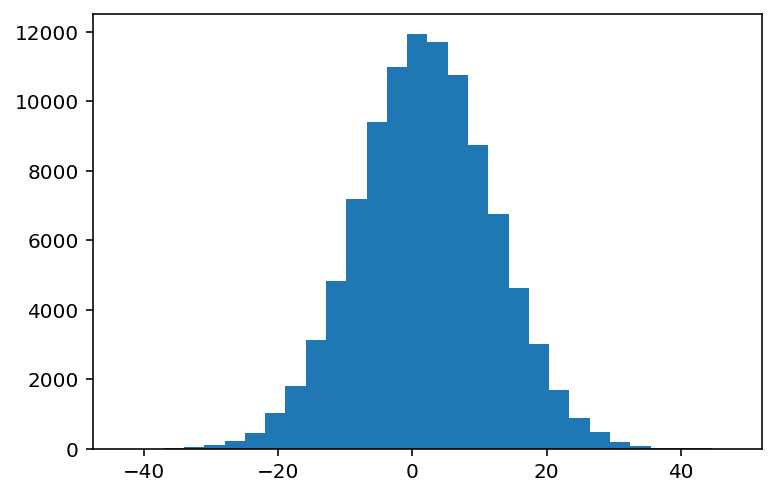

In [22]:

#data = np.random.random(100000)*2 - 1

data = np.random.randn(100000)*10 + 2

plt.hist(data, bins=30)
print(np.mean(data), np.std(data))

6) What does np.random.seed do?

### Monte Carlo Integration

In [37]:
def gen_point():
    x = np.random.random()*2 - 1
    y = np.random.random()*2 - 1
    return x, y

def is_in_circle(x, y):
    return x**2 + y**2 < 1

def circle_area(n):
    n_in_circle = 0
    for i in range(n):
        x, y = gen_point()
        if is_in_circle(x, y):
            n_in_circle += 1
    square_area = 2**2
    return n_in_circle/n * square_area

circle_area(1000000)

3.142184

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

In [47]:
def f(x, y, z):
    return x**2*(y-1)**2*(z-2)**2*np.exp(x*y*z)

def gen_point():
    x = np.random.random()*2 - 1
    y = np.random.random()*2 - 1
    z = np.random.random()*2 - 1
    return x, y, z

def integrate(n):
    s = 0
    for i in range(n):
        x, y, z = gen_point()
        s+= f(x,y,z)
    return s * 2**3 / n

integrate(100000)

15.987446702814003

#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

In [48]:
def f(x, y, z):
    return x**2*(y-1)**2*(z-2)**2*np.exp(x*y*z)

def gen_point():
    x = np.random.random()*2 - 1
    y = np.random.random()*2 - 1
    z = np.random.random()*2 - 1
    return x, y, z

def is_in_circle(x, y, z):
    return x**2 + y**2 + z**2 < 1

def integrate(n):
    s = 0
    for i in range(n):
        x, y, z = gen_point()
        if is_in_circle(x, y, z):
            s+= f(x,y,z)
    return s * 2**3 / n

integrate(100000)

4.00962611684942

3) Do we guarantee to get the same answer when we repeat the experiment?

4) What do we need to do to guarantee the same answer?

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Monte Carlo Simulations

### Loaded Die.

<table>
<tr style="text-align:center">
    <td>Number</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
</tr>
<tr style="text-align:center">
    <td>Probability</td>
    <td>0.3</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.1</td>
</tr>
</table>

#### 1) Simulating the dice.

Simulate the dice result such that it has the given probability distribution.

(array([3040.,    0.,    0.,    0., 1969.,    0.,    0.,    0., 1023.,
           0.,    0.,    0., 2007.,    0.,    0.,    0.,  937.,    0.,
           0., 1024.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <BarContainer object of 20 artists>)

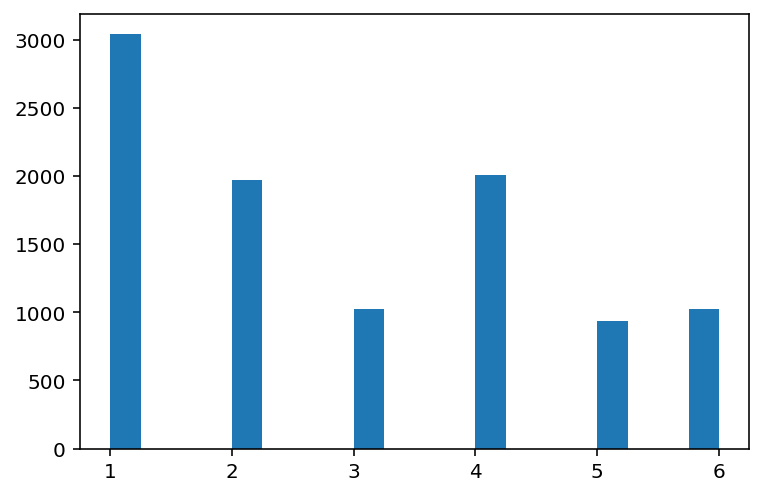

In [54]:
def gacha():
    x = np.random.random()
    if x < 0.3:
        return 1
    elif x < 0.5:
        return 2
    elif x < 0.6:
        return 3
    elif x < 0.8:
        return 4
    elif x < 0.9:
        return 5
    else:
        return 6

    
gachas = [gacha() for i in range(10000)]
plt.hist(gachas, bins=20)

#### 2) Expected Value.

What is the expected value of dice result? Try both simulation and analytical formula.

In [55]:
np.mean([gacha() for i in range(10000)])

2.8977

3) What is the expected value of $A+B$ where $A$ is the result of the first dice and $B$ is the result of the second dice? Use simulation and compare with analytic answer.

In [56]:
np.mean([gacha() + gacha() for i in range(10000)])

5.8308

4) What is the expected value of $AB$?

In [59]:
np.mean([gacha()* gacha() for i in range(10000)])

8.5364

5) Try the experiment 10,000 times and plot out the probability of getting each result for $AB$. (Probability is given by #of times we get the number/total number of experiment.

(array([ 871., 1219.,  601.,    0., 1598.,  569.,    0., 1060.,    0.,
           0.,  767.,  110.,  420.,    0.,    0.,  805.,    0.,    0.,
           0.,    0.,  193.,  414.,    0.,    0.,  209.,    0.,    0.,
         374.,    0.,    0.,    0.,    0.,  382.,    0.,  110.,    0.,
           0.,    0.,    0.,    0.,    0.,  202.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   96.]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ,
         8.7,  9.4, 10.1, 10.8, 11.5, 12.2, 12.9, 13.6, 14.3, 15. , 15.7,
        16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. , 22.7, 23.4,
        24.1, 24.8, 25.5, 26.2, 26.9, 27.6, 28.3, 29. , 29.7, 30.4, 31.1,
        31.8, 32.5, 33.2, 33.9, 34.6, 35.3, 36. ]),
 <BarContainer object of 50 artists>)

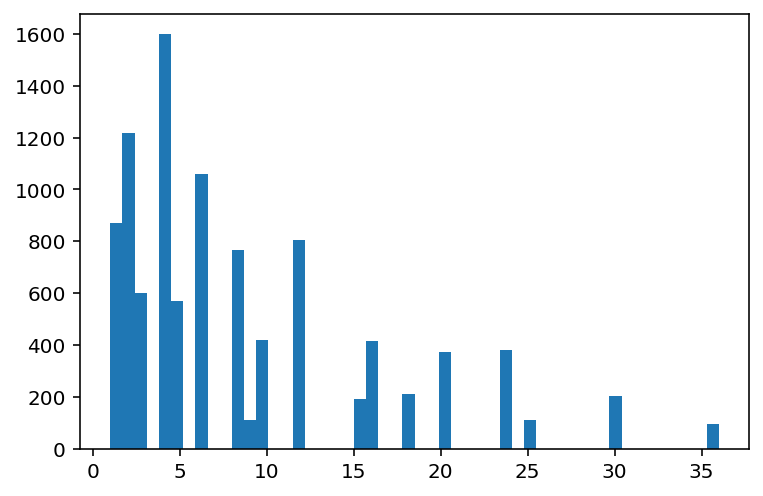

In [62]:
gp = [gacha()* gacha() for i in range(10000)]
plt.hist(gp, bins=50)

6) Now we play the games of two people. We take the product of the two dice. Whoever get more number wins. What is the probability of getting a draw.

In [64]:
gp = [gacha()*gacha()  == gacha()*gacha()  for i in range(10000)]
sum(gp)/len(gp)

0.088

7) A little bit harder: consider the game of product dice. If our first dice is 3, what is the probability of winning?

In [65]:
gp = [gacha()*gacha() < 3*gacha()  for i in range(10000)]
sum(gp)/len(gp)

0.5348

### Geometric Brownian Motion.

One popular way to simulate stock is using geometric brownian motion. Stockprice at $t+dt$ is related to the stock price at time $t$ by

$$s(t+dt) = s(t) + s(t)(\mu dt + \epsilon\sigma \sqrt{dt}) $$

where
1. $\mu$ is the mean rate of return. Typically quote as $\%$ per year.
2. $\epsilon$ is a normally distributed random variable with mean 0 and variance of 1.
3. $\sigma$ is called volatility. It typically quoted as $\%$ per $\sqrt{\text{year}}$. It represent how wildly stock can go.

To use this formula, we need to make sure the unit for $t$ is correct. Normally just convert it to year

All these number can be looked up from the internet (you can calculate one yourself from historical data too). 

Here is one example: google for aapl volatility.

The funny unit of $\sqrt{t}$ has to do with scaling behavior. You can read it in the lecture notes.

1) Given the volatility($\sigma$) of $28\%$ per $\sqrt{\text{year}}$ and mean rate of return $8.77\%$. The stock today is 119.21$. Write a function to generate the price for tomorrow given the price today.

In [10]:
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
def stock_price_tmrw(s, mu, sigma, dt):
    return s + s * (mu*dt + np.random.randn()*sigma*sqrt(dt))
    

2) Generate the price for 1 trading year(all the time we said year it actually means trading year). Have dt = 1 day. 1 Trading year is actually 252 day.

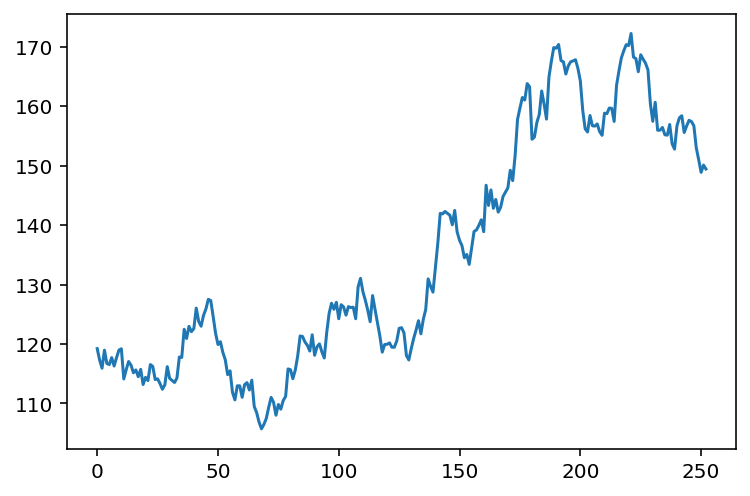

In [24]:
def generate_year(s, mu, sigma):
    dt = 1/252.
    ret = [s]
    for i in range(252):
        s = stock_price_tmrw(s, mu, sigma, dt)
        ret.append(s)
    return ret

stock = generate_year(s=119.21, mu=0.0877, sigma=0.28)

plt.plot(stock)

3) What is the expected value of the stock at the end of year?

In [26]:
stock_scenarios = [generate_year(s=119.21, mu=0.0877, sigma=0.28) for i in range(1000)]

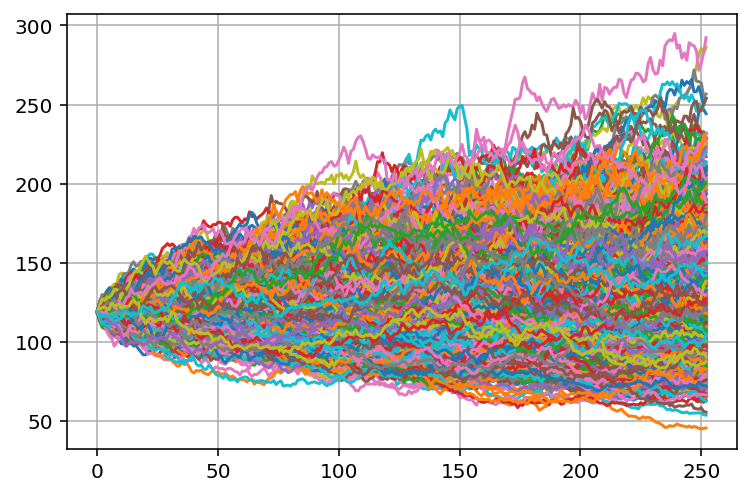

In [28]:
for ss in stock_scenarios:
    plt.plot(ss)
plt.grid()

In [29]:
end_prices = [ss[-1] for ss in stock_scenarios]

In [30]:
np.average(end_prices)

131.9896610205445

4) What is the variance of the stock at the end of the year?

In [33]:
np.var(end_prices)

36.380281881041505

5) What is the probability that the price of the stock will dip below 70 at anytime of the year?

In [36]:
def dip_below_70(stock):
    return min(stock) < 70

n_dip = sum([1 if dip_below_70(ss) else 0 for ss in stock_scenarios])
n_all = len(stock_scenarios)
print(n_dip/n_all)

0.034


6) What is the proabability that th stock will dip below 100 and come back to 110 within a year? 

In [37]:
def dip_and_come_back(stock):
    dip = False
    comeback = False
    for s in stock:
        if s<100 and not dip:
            dip = True
        if dip and s>110:
            comeback=True
    return dip & comeback

n_dip = sum([1 if dip_and_come_back(ss) else 0 for ss in stock_scenarios])
n_all = len(stock_scenarios)
print(n_dip/n_all)

0.251


7) If we buy the stock today at 119.21 dollar and our stragy is that we would sell if the stock fall more than 5 dollar or go up more than 10 dollar.

7.1) What is the probability that we get to sell it?

7.2) If we get to sell it what's the probability of making profit.

In [48]:
def got_to_sell(stocks)->int: # +1 sell for profit -1 sell at a loss, 0 never get to sell
    bought = 119.21
    for s in stocks:
        if s < bought-5:
            return -1
        if s > bought+10:
            return +1
    return 0

sold = np.array([got_to_sell(s) for s in stock_scenarios])
print(sum(np.abs(sold))/len(stock_scenarios))
print('sell at loss', sum(sold<0)/len(stock_scenarios))
print('sell for profit', sum(sold>0)/len(stock_scenarios))

1.0
sell at loss 0.597
sell for profit 0.403


In [49]:
10*0.4 - 5*0.6

1.0